___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [3]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [11]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [13]:
#sns.pairplot(df)

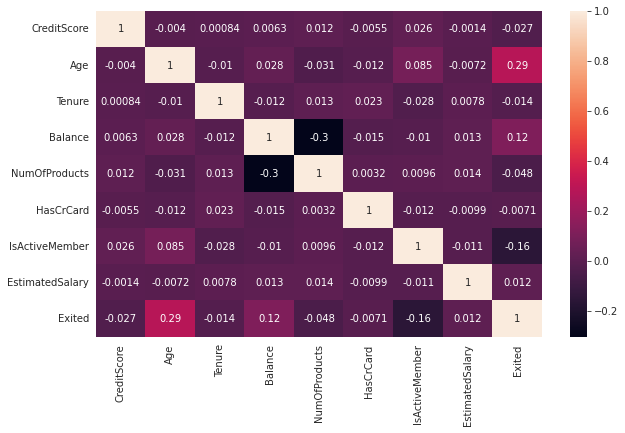

In [14]:
sns.heatmap(df.corr(), annot=True);

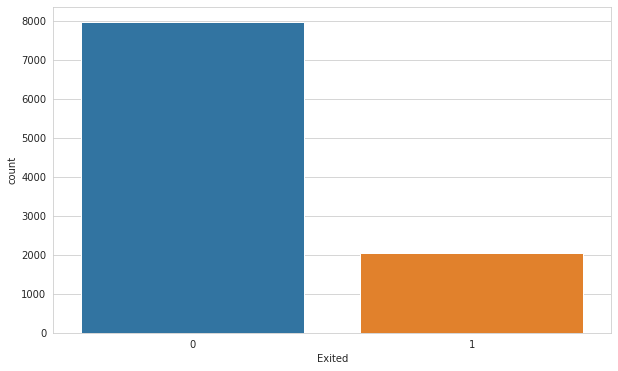

In [15]:
sns.countplot(df['Exited']);

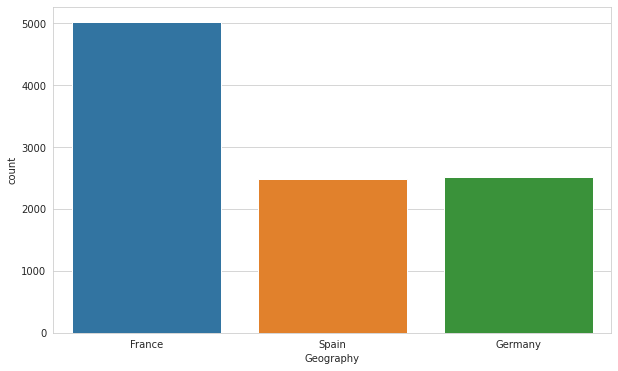

In [16]:
sns.countplot(df['Geography']);

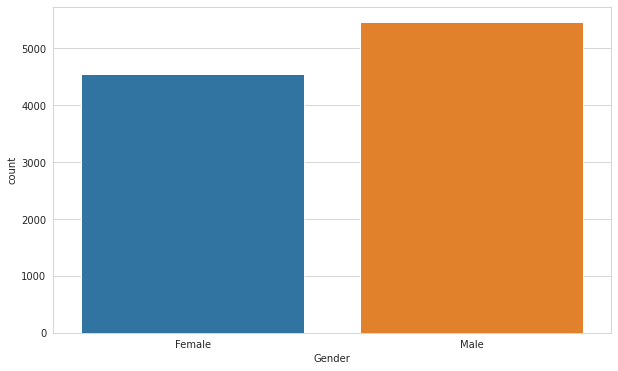

In [17]:
sns.countplot(df['Gender']);

In [18]:
geography_dummy = pd.get_dummies(df["Geography"], prefix = "Geography", drop_first=True)

In [19]:
df = pd.concat([df, geography_dummy], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,0,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0,1
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,0,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,1


In [20]:
gender_dummy = pd.get_dummies(df["Gender"], prefix = "Gender", drop_first=True)
df = pd.concat([df, gender_dummy], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [21]:
df.drop(['Gender', 'Geography'], axis=1, inplace=True)

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X=df.drop('Exited', axis=1)
y=df['Exited']

In [25]:
seed = 47

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

In [31]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
X_train.shape

(9000, 11)

In [33]:
X_test.shape

(1000, 11)

In [34]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(17, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) #I'm using single output neuron as this is a 0/1 classification. 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                204       
                                                                 
 dense_1 (Dense)             (None, 8)                 144       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 17) dtype=float32, numpy=
 array([[ 0.29750466,  0.09265876,  0.3456679 , -0.11737517,  0.10474849,
          0.3652284 ,  0.08429217,  0.1687026 ,  0.3004604 ,  0.21695995,
         -0.23557346,  0.45507205, -0.21727946, -0.1185424 ,  0.30647117,
         -0.31870693, -0.12096417],
        [-0.32326162, -0.3961288 ,  0.34413147,  0.04910785,  0.23891532,
          0.09574842,  0.17915332, -0.35471714, -0.46020132,  0.1270864 ,
          0.2895192 , -0.33674014, -0.20949036, -0.26884383,  0.28357875,
          0.32606447, -0.36004773],
        [ 0.3007223 ,  0.3107112 , -0.3909064 , -0.01722476,  0.0282912 ,
          0.25866705, -0.13524866,  0.44905955,  0.23883855,  0.42163634,
          0.44239372, -0.38666004,  0.22404152, -0.30484647,  0.43016952,
          0.3679375 , -0.20671487],
        [-0.4290322 , -0.26061273, -0.20574683,  0.29183942, -0.24238692,
          0.2189427 , -0.19054088, -0.14884669,  0.03220147, -0.01156926,
         -

In [37]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 101, epochs = 1000, verbose=1)

Epoch 1/1000
76/76 [==============================] - 1s 5ms/step - loss: 0.5369 - accuracy: 0.7982 - val_loss: 0.4932 - val_accuracy: 0.7933
Epoch 2/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.7980 - val_loss: 0.4789 - val_accuracy: 0.7956
Epoch 3/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.8017 - val_loss: 0.4693 - val_accuracy: 0.8030
Epoch 4/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.8055 - val_loss: 0.4598 - val_accuracy: 0.8074
Epoch 5/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.8102 - val_loss: 0.4489 - val_accuracy: 0.8119
Epoch 6/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8139 - val_loss: 0.4365 - val_accuracy: 0.8215
Epoch 7/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8157 - val_loss: 0.4280 - val_accuracy: 0.8252
Epoch 

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.537,0.798,0.493,0.793
1,0.475,0.798,0.479,0.796
2,0.462,0.802,0.469,0.803
3,0.455,0.805,0.460,0.807
4,0.448,0.810,0.449,0.812


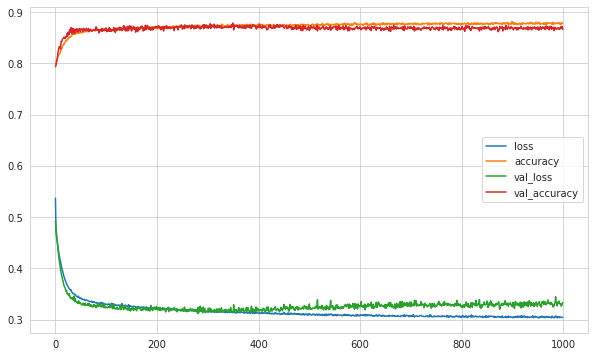

In [39]:
loss_df.plot();
#There's overfitting, as the difference bwteen loss and val_loss increases. This should be fixed.

In [40]:
model.evaluate(X_test, y_test, verbose=0)

[0.4084015488624573, 0.8320000171661377]

In [41]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4084015488624573
accuracy :  0.8320000171661377


In [42]:
y_pred = model.predict(X_test) > 0.5 #Treshold for Sigmoid function.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[725  62]
 [106 107]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       787
           1       0.63      0.50      0.56       213

    accuracy                           0.83      1000
   macro avg       0.75      0.71      0.73      1000
weighted avg       0.82      0.83      0.82      1000



**Early Stopping**

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(17, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [76]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [77]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 101, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
76/76 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8503 - val_loss: 0.3151 - val_accuracy: 0.8659
Epoch 2/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.8539 - val_loss: 0.3173 - val_accuracy: 0.8652
Epoch 3/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.3588 - accuracy: 0.8528 - val_loss: 0.3144 - val_accuracy: 0.8681
Epoch 4/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.8544 - val_loss: 0.3166 - val_accuracy: 0.8630
Epoch 5/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.8549 - val_loss: 0.3160 - val_accuracy: 0.8637
Epoch 6/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8493 - val_loss: 0.3162 - val_accuracy: 0.8622
Epoch 7/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.3542 - accuracy: 0.8522 - val_loss: 0.3139 - val_accuracy: 0.8659
Epoch 

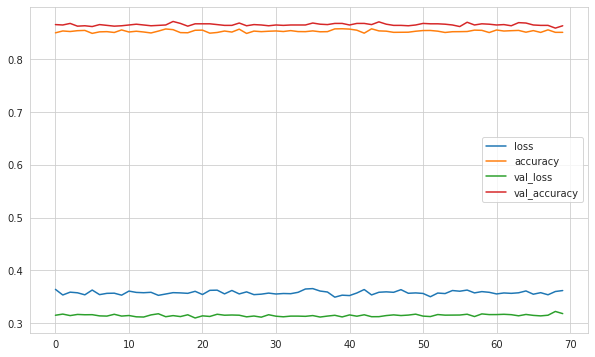

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [80]:
#Loss is a bit lower. Accuracy is almost the same.
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.36935392022132874
accuracy :  0.8460000157356262


In [81]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[768  19]
 [135  78]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       787
           1       0.80      0.37      0.50       213

    accuracy                           0.85      1000
   macro avg       0.83      0.67      0.71      1000
weighted avg       0.84      0.85      0.82      1000



**Learning Rate**

In [50]:
from tensorflow.keras.optimizers import Adam

In [82]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(17, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.002) #increasing lr.
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [83]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [84]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 101, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
76/76 [==============================] - 1s 6ms/step - loss: 0.5089 - accuracy: 0.7982 - val_loss: 0.4821 - val_accuracy: 0.7933
Epoch 2/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.8046 - val_loss: 0.4637 - val_accuracy: 0.8074
Epoch 3/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.8097 - val_loss: 0.4414 - val_accuracy: 0.8207
Epoch 4/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.8136 - val_loss: 0.4175 - val_accuracy: 0.8237
Epoch 5/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8169 - val_loss: 0.4072 - val_accuracy: 0.8319
Epoch 6/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8234 - val_loss: 0.3984 - val_accuracy: 0.8319
Epoch 7/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8263 - val_loss: 0.3923 - val_accuracy: 0.8437
Epoch 

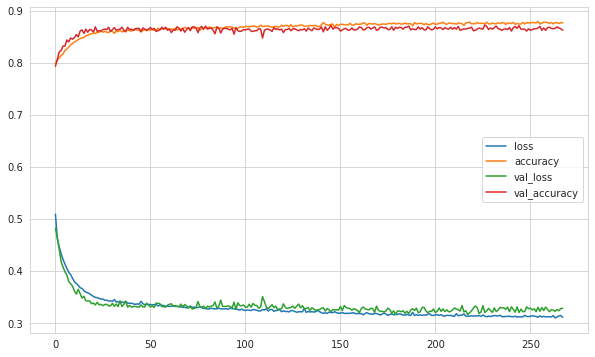

In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [86]:
#Loss got a bit worse.
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.389394074678421
accuracy :  0.8399999737739563


In [87]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[744  43]
 [117  96]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       787
           1       0.69      0.45      0.55       213

    accuracy                           0.84      1000
   macro avg       0.78      0.70      0.72      1000
weighted avg       0.83      0.84      0.83      1000



**Dropout**

In [66]:
from tensorflow.keras.layers import Dropout

In [88]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(17, activation="relu", input_dim = X_train.shape[1]))
#model.add(Dropout(0.25))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(4, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [89]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 101, epochs = 1000, verbose = 1)

Epoch 1/1000
76/76 [==============================] - 1s 5ms/step - loss: 0.5502 - accuracy: 0.7980 - val_loss: 0.4933 - val_accuracy: 0.7933
Epoch 2/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7980 - val_loss: 0.4803 - val_accuracy: 0.7933
Epoch 3/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7984 - val_loss: 0.4713 - val_accuracy: 0.7933
Epoch 4/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.8020 - val_loss: 0.4636 - val_accuracy: 0.7948
Epoch 5/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8029 - val_loss: 0.4559 - val_accuracy: 0.7956
Epoch 6/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8017 - val_loss: 0.4486 - val_accuracy: 0.7933
Epoch 7/1000
76/76 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.8071 - val_loss: 0.4430 - val_accuracy: 0.8030
Epoch 

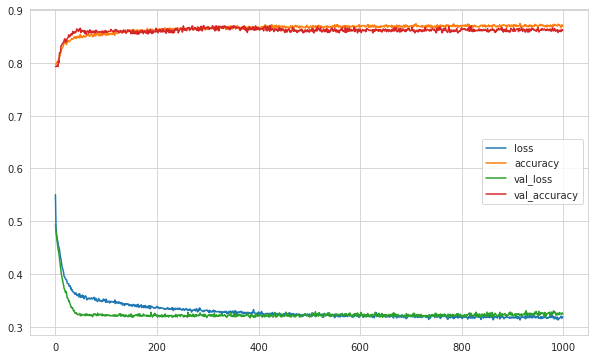

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [91]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3914332687854767
accuracy :  0.8379999995231628


In [92]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[749  38]
 [124  89]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       787
           1       0.70      0.42      0.52       213

    accuracy                           0.84      1000
   macro avg       0.78      0.68      0.71      1000
weighted avg       0.82      0.84      0.82      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [51]:
#My loss values are pretty high. The best loss value I got is0.36 with an overfitting model. Seems like I did some stuff wrong.

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [94]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(17, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [95]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6270903010033445, 1: 2.4671052631578947}

In [96]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 101, epochs = 1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
76/76 [==============================] - 2s 8ms/step - loss: 0.6791 - accuracy: 0.7593 - val_loss: 0.6349 - val_accuracy: 0.7274
Epoch 2/1000
76/76 [==============================] - 0s 6ms/step - loss: 0.6559 - accuracy: 0.7175 - val_loss: 0.6353 - val_accuracy: 0.6444
Epoch 3/1000
76/76 [==============================] - 0s 6ms/step - loss: 0.6253 - accuracy: 0.6703 - val_loss: 0.6186 - val_accuracy: 0.6585
Epoch 4/1000
76/76 [==============================] - 0s 5ms/step - loss: 0.6099 - accuracy: 0.6711 - val_loss: 0.6049 - val_accuracy: 0.6719
Epoch 5/1000
76/76 [==============================] - 0s 5ms/step - loss: 0.5974 - accuracy: 0.6907 - val_loss: 0.6050 - val_accuracy: 0.6659
Epoch 6/1000
76/76 [==============================] - 0s 5ms/step - loss: 0.5831 - accuracy: 0.6957 - val_loss: 0.5799 - val_accuracy: 0.7030
Epoch 7/1000
76/76 [==============================] - 0s 5ms/step - loss: 0.5723 - accuracy: 0.7029 - val_loss: 0.6090 - val_accuracy: 0.6748
Epoch 

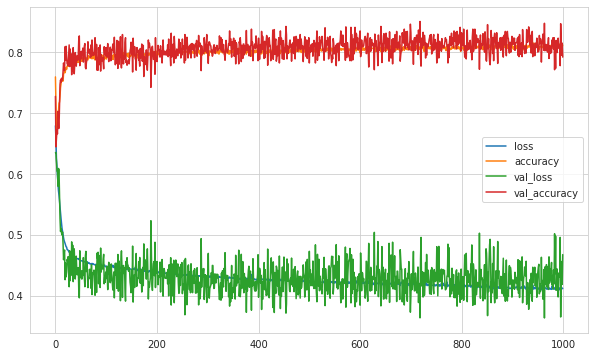

In [97]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [98]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.565253496170044
accuracy :  0.7310000061988831


In [99]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[575 212]
 [ 57 156]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       787
           1       0.42      0.73      0.54       213

    accuracy                           0.73      1000
   macro avg       0.67      0.73      0.67      1000
weighted avg       0.81      0.73      0.75      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [52]:
#Values got even worse with class weight parameter.

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___